In [47]:
# from Learning Pandas
# https://www.packtpub.com/packtlib/book/Application-Development/9781783985128/1/ch01lvl1sec11/Primary%20pandas%20objects

# import numpy and pandas, and DataFrame / Series
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

# Set some pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# And some items for matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
#pd.options.display.mpl_style = 'default' #issues with matplotlib
plt.style.use('default')

In [3]:
s = Series([1, 2, 3, 4])
s

0    1
1    2
2    3
3    4
dtype: int64

In [4]:
s[[1, 3]]

1    2
3    4
dtype: int64

In [5]:
s = Series([1, 2, 3, 4], 
           index = ['a', 'b', 'c', 'd'])
s

a    1
b    2
c    3
d    4
dtype: int64

In [6]:
s[['a', 'd']]

a    1
d    4
dtype: int64

In [7]:
s[[1, 2]]

b    2
c    3
dtype: int64

In [9]:
s.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [10]:
dates = pd.date_range('2014-07-01', '2014-07-06')
dates

DatetimeIndex(['2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04',
               '2014-07-05', '2014-07-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
temps1 = Series([80, 82, 85, 90, 83, 87], 
                 index = dates)
temps1

2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, dtype: int64

In [12]:
temps1.mean()

84.5

In [13]:
temps2 = Series([70, 75, 69, 83, 79, 77],
                index = dates)

temp_diffs = temps1 - temps2
temp_diffs

2014-07-01    10
2014-07-02     7
2014-07-03    16
2014-07-04     7
2014-07-05     4
2014-07-06    10
Freq: D, dtype: int64

In [14]:
temp_diffs['2014-07-03']

16

In [15]:
temp_diffs[2]

16

**DataFrame**

In [16]:
temps_df = DataFrame(
    {'Missoula': temps1,
     'Philadelphia': temps2})
temps_df

            Missoula  Philadelphia
2014-07-01        80            70
2014-07-02        82            75
2014-07-03        85            69
2014-07-04        90            83
2014-07-05        83            79
2014-07-06        87            77

In [17]:
temps_df['Missoula']

2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, Name: Missoula, dtype: int64

In [18]:
temps_df['Philadelphia']

2014-07-01    70
2014-07-02    75
2014-07-03    69
2014-07-04    83
2014-07-05    79
2014-07-06    77
Freq: D, Name: Philadelphia, dtype: int64

In [19]:
temps_df[['Philadelphia', 'Missoula']]

            Philadelphia  Missoula
2014-07-01            70        80
2014-07-02            75        82
2014-07-03            69        85
2014-07-04            83        90
2014-07-05            79        83
2014-07-06            77        87

In [20]:
temps_df.Missoula

2014-07-01    80
2014-07-02    82
2014-07-03    85
2014-07-04    90
2014-07-05    83
2014-07-06    87
Freq: D, Name: Missoula, dtype: int64

In [21]:
temps_df.Missoula - temps_df.Philadelphia

2014-07-01    10
2014-07-02     7
2014-07-03    16
2014-07-04     7
2014-07-05     4
2014-07-06    10
Freq: D, dtype: int64

In [22]:
temps_df['Difference'] = temp_diffs
temps_df

            Missoula  Philadelphia  Difference
2014-07-01        80            70          10
2014-07-02        82            75           7
2014-07-03        85            69          16
2014-07-04        90            83           7
2014-07-05        83            79           4
2014-07-06        87            77          10

In [23]:
temps_df.columns

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [24]:
temps_df.Difference[1:4]

2014-07-02     7
2014-07-03    16
2014-07-04     7
Freq: D, Name: Difference, dtype: int64

In [25]:
temps_df.iloc[1]

Missoula        82
Philadelphia    75
Difference       7
Name: 2014-07-02 00:00:00, dtype: int64

In [26]:
temps_df.ix[1].index

Index(['Missoula', 'Philadelphia', 'Difference'], dtype='object')

In [27]:
temps_df.loc['2014-07-03']

Missoula        85
Philadelphia    69
Difference      16
Name: 2014-07-03 00:00:00, dtype: int64

In [28]:
temps_df.iloc[[1, 3, 5]].Difference

2014-07-02     7
2014-07-04     7
2014-07-06    10
Freq: 2D, Name: Difference, dtype: int64

In [29]:
temps_df.Missoula > 82

2014-07-01    False
2014-07-02    False
2014-07-03     True
2014-07-04     True
2014-07-05     True
2014-07-06     True
Freq: D, Name: Missoula, dtype: bool

In [30]:
temps_df[temps_df.Missoula > 82]

            Missoula  Philadelphia  Difference
2014-07-03        85            69          16
2014-07-04        90            83           7
2014-07-05        83            79           4
2014-07-06        87            77          10

Loading Data from files and the Web

In [31]:
!cat Data/pandas_test1.csv

 date,0,1,2
   2000-01-01 00:00:00,1.10376250134,-1.90997889703,-0.808955536115
   2000-01-02 00:00:00,1.18891664768,0.581119740849,0.86159734949
   2000-01-03 00:00:00,-0.964200042412,0.779764393246,1.82906224532
   2000-01-04 00:00:00,0.782130444001,-1.72066965573,-1.10824167327
   2000-01-05 00:00:00,-1.86701699823,-0.528368292754,-2.48830894087
   2000-01-06 00:00:00,2.56928022646,-0.471901478927,-0.835033249865
   2000-01-07 00:00:00,-0.39932258251,-0.676426550985,-0.0112559158931
   2000-01-08 00:00:00,1.64299299394,1.01341997845,1.43566709724
   2000-01-09 00:00:00,1.14730764657,2.13799951538,0.554171306191
   2000-01-10 00:00:00,0.933765825769,1.38715526486,-0.560142729978


In [32]:
df = pd.read_csv('Data/pandas_test1.csv', skipinitialspace=True)
df

                  date         0         1         2
0  2000-01-01 00:00:00  1.103763 -1.909979 -0.808956
1  2000-01-02 00:00:00  1.188917  0.581120  0.861597
2  2000-01-03 00:00:00 -0.964200  0.779764  1.829062
3  2000-01-04 00:00:00  0.782130 -1.720670 -1.108242
4  2000-01-05 00:00:00 -1.867017 -0.528368 -2.488309
5  2000-01-06 00:00:00  2.569280 -0.471901 -0.835033
6  2000-01-07 00:00:00 -0.399323 -0.676427 -0.011256
7  2000-01-08 00:00:00  1.642993  1.013420  1.435667
8  2000-01-09 00:00:00  1.147308  2.138000  0.554171
9  2000-01-10 00:00:00  0.933766  1.387155 -0.560143

In [33]:
df.date

0    2000-01-01 00:00:00
1    2000-01-02 00:00:00
2    2000-01-03 00:00:00
3    2000-01-04 00:00:00
4    2000-01-05 00:00:00
5    2000-01-06 00:00:00
6    2000-01-07 00:00:00
7    2000-01-08 00:00:00
8    2000-01-09 00:00:00
9    2000-01-10 00:00:00
Name: date, dtype: object

In [35]:
df.date[0]

In [35]:
type(df.date[0])

str

In [36]:
df = pd.read_csv('Data/pandas_test1.csv', 
                 skipinitialspace=True,
                 parse_dates=['date'])
df

        date         0         1         2
0 2000-01-01  1.103763 -1.909979 -0.808956
1 2000-01-02  1.188917  0.581120  0.861597
2 2000-01-03 -0.964200  0.779764  1.829062
3 2000-01-04  0.782130 -1.720670 -1.108242
4 2000-01-05 -1.867017 -0.528368 -2.488309
5 2000-01-06  2.569280 -0.471901 -0.835033
6 2000-01-07 -0.399323 -0.676427 -0.011256
7 2000-01-08  1.642993  1.013420  1.435667
8 2000-01-09  1.147308  2.138000  0.554171
9 2000-01-10  0.933766  1.387155 -0.560143

In [37]:
type(df.date[0])

pandas.tslib.Timestamp

In [38]:
df.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [39]:
df = pd.read_csv('Data/pandas_test1.csv', 
                 parse_dates=['date'],
                 skipinitialspace=True,
                 index_col='date')
df

                   0         1         2
date                                    
2000-01-01  1.103763 -1.909979 -0.808956
2000-01-02  1.188917  0.581120  0.861597
2000-01-03 -0.964200  0.779764  1.829062
2000-01-04  0.782130 -1.720670 -1.108242
2000-01-05 -1.867017 -0.528368 -2.488309
2000-01-06  2.569280 -0.471901 -0.835033
2000-01-07 -0.399323 -0.676427 -0.011256
2000-01-08  1.642993  1.013420  1.435667
2000-01-09  1.147308  2.138000  0.554171
2000-01-10  0.933766  1.387155 -0.560143

In [40]:
df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', name='date', freq=None)

In [41]:
#imports fpr reading data from Yahoo!
#from pandas.io.data import DataReader
from pandas_datareader.data import DataReader
from datetime import date
from dateutil.relativedelta import relativedelta

goog = DataReader("GOOG", "yahoo",
                  date.today() +
                  relativedelta(months=-3))

goog.tail()

                  Open        High         Low       Close   Volume  \
Date                                                                  
2015-12-16  750.000000  760.590027  739.434998  758.090027  1980000   
2015-12-17  762.419983  762.679993  749.000000  749.429993  1544600   
2015-12-18  746.510010  754.130005  738.150024  739.309998  3118000   
2015-12-21  746.130005  750.000000  740.000000  747.770020  1509200   
2015-12-22  751.650024  754.849976  745.530029  750.000000  1365400   

             Adj Close  
Date                    
2015-12-16  758.090027  
2015-12-17  749.429993  
2015-12-18  739.309998  
2015-12-21  747.770020  
2015-12-22  750.000000  

In [42]:
#imports fpr reading data from Yahoo!
#from pandas.io.data import DataReader
from pandas_datareader.data import DataReader
from datetime import date
from dateutil.relativedelta import relativedelta

googG = DataReader("GOOG", "google",
                  date.today() +
                  relativedelta(months=-3))

googG.tail()

              Open    High     Low   Close   Volume
Date                                               
2015-12-15  753.00  758.08  743.01  743.40  2666229
2015-12-16  750.00  760.59  739.44  758.09  1993251
2015-12-18  746.51  754.13  738.15  739.31  3148743
2015-12-21  746.13  750.00  740.00  747.77  1525703
2015-12-22  751.65  754.85  745.53  750.00  1365520

In [43]:
#imports fpr reading data from Yahoo!
#from pandas.io.data import DataReader
from pandas_datareader.data import DataReader
from datetime import date
from dateutil.relativedelta import relativedelta

fred = DataReader("VIXCLS", "fred",
                  date.today() +
                  relativedelta(months=-3))

fred.tail()

            VIXCLS
DATE              
2015-12-16   17.86
2015-12-17   18.94
2015-12-18   20.70
2015-12-21   18.70
2015-12-22   16.60

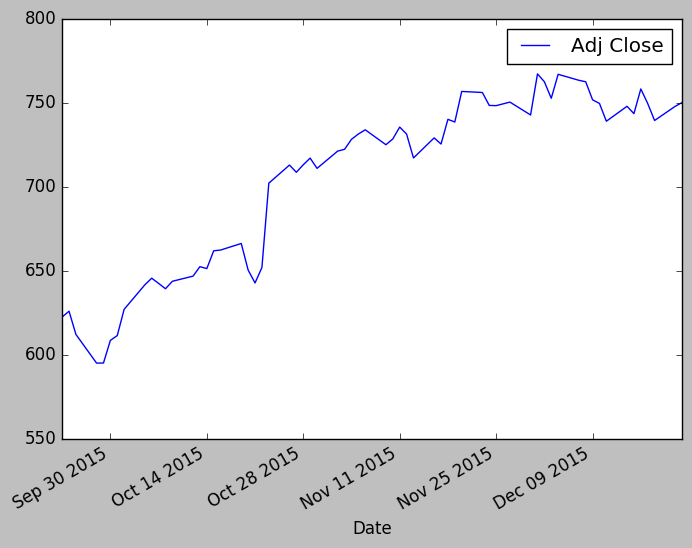

In [51]:
goog.plot(y='Adj Close')

## Chapter 3 ##

In [53]:
import numpy as np

In [57]:
def squares(values):
    result = []
    for v in values:
        result.append(v*v)
    return result
    
    
to_square = range(100000)

%timeit squares(to_square)

100 loops, best of 3: 15.4 ms per loop


In [59]:
# NumPy vectorization

array_to_square = np.arange(0, 100000)
%timeit array_to_square ** 2

The slowest run took 6.68 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 77 µs per loop


In [61]:
a1 = np.array([1, 2, 3, 4, 5])
a1

array([1, 2, 3, 4, 5])

In [65]:
# n-dimensional array
type(a1)

numpy.ndarray

In [66]:
np.size(a1)

5

In [73]:
a2 = np.array([1, 2, 3, 4.0, 5.0])
a2

array([ 1.,  2.,  3.,  4.,  5.])

In [74]:
a2.dtype

dtype('float64')

In [75]:
a3 = np.array([0] * 10)
a3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [76]:
np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [79]:
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [81]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

In [83]:
np.arange(10, 0, -1)

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [85]:
np.linspace(0, 10, 4)

array([  0.        ,   3.33333333,   6.66666667,  10.        ])

In [86]:
a1 = np.arange(0, 10)
a1 * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [87]:
a2 = np.arange(10, 20)
a1 + a2

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])

In [91]:
np.array([[1, 2], [3,4]])

array([[1, 2],
       [3, 4]])

In [92]:
m = np.arange(0, 20).reshape(5, 4)
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [93]:
np.size(m)

20

In [94]:
np.size(m, 0)

5

In [96]:
np.size(m, 1)

4

In [97]:
m[1, 2]

6

In [98]:
m[1,]

array([4, 5, 6, 7])

In [99]:
m[:, 2]

array([ 2,  6, 10, 14, 18])

In [101]:
a = np.arange(5)
a < 2

array([ True,  True, False, False, False], dtype=bool)

In [102]:
( a < 2 ) | ( a > 3 )

array([ True,  True, False, False,  True], dtype=bool)

In [103]:
def exp (x):
    return x<3 or x>3
np.vectorize(exp)(a)

array([ True,  True,  True, False,  True], dtype=bool)

In [105]:
# Boolean selection
r = a < 3
a[r]

array([0, 1, 2])

In [106]:
np.sum(a < 3)

3

In [109]:
a1 = np.arange(0, 5)
a2 = np.arange(5, 0, -1)
a1 < a2

array([ True,  True,  True, False, False], dtype=bool)

In [110]:
a1 = np.arange(9).reshape(3, 3)
a2 = np.arange(9, 0, -1).reshape(3, 3)
a1 < a2

array([[ True,  True,  True],
       [ True,  True, False],
       [False, False, False]], dtype=bool)

In [112]:
a1 = np.arange(1, 10)
a1[3:8]

array([4, 5, 6, 7, 8])

In [113]:
a1[::2]

array([1, 3, 5, 7, 9])

In [118]:
a1[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1])

In [119]:
a1[9:0:-1]

array([9, 8, 7, 6, 5, 4, 3, 2])

In [120]:
a1[5:]

array([6, 7, 8, 9])

In [121]:
a1[:5]

array([1, 2, 3, 4, 5])

In [125]:
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [127]:
# all rows, column position 1
m[:,1]

array([ 1,  5,  9, 13, 17])

In [126]:
m[:,1:3]

array([[ 1,  2],
       [ 5,  6],
       [ 9, 10],
       [13, 14],
       [17, 18]])

In [128]:
m[3:5, :]

array([[12, 13, 14, 15],
       [16, 17, 18, 19]])

In [129]:
m[3:5, 1:3]

array([[13, 14],
       [17, 18]])

In [130]:
m[[1,3,4],:]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [133]:
a = np.arange(0, 9)
m = a.reshape(3, 3)
m

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [134]:
reshaped = m.reshape(9)
reshaped

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [137]:
raveled = m.ravel()
raveled

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [138]:
m

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [140]:
reshaped = m.reshape(np.size(m))
raveled = m.ravel()
reshaped[2] = 1000
raveled[5] = 2000
m

array([[   0,    1, 1000],
       [   3,    4, 2000],
       [   6,    7,    8]])

In [153]:
# flattened makes a copy
m2 = np.arange(0, 9).reshape(3, 3)
flattened = m2.flatten()
flattened[0] = 1000
flattened

array([1000,    1,    2,    3,    4,    5,    6,    7,    8])

In [155]:
m2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [159]:
flattened.shape

(9,)

In [161]:
flattened.shape = (3, 3)
flattened

array([[1000,    1,    2],
       [   3,    4,    5],
       [   6,    7,    8]])

In [162]:
flattened.transpose()

array([[1000,    3,    6],
       [   1,    4,    7],
       [   2,    5,    8]])

In [163]:
flattened.T

array([[1000,    3,    6],
       [   1,    4,    7],
       [   2,    5,    8]])

In [164]:
m = np.arange(0, 9).reshape(3, 3)
m.resize(1, 9)
m

array([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [166]:
a = np.arange(9).reshape(3, 3)
b = (a + 1) * 10
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [169]:
b

array([[10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

In [171]:
np.hstack((a, b))

array([[ 0,  1,  2, 10, 20, 30],
       [ 3,  4,  5, 40, 50, 60],
       [ 6,  7,  8, 70, 80, 90]])

In [174]:
np.concatenate((a, b), axis = 1)

array([[ 0,  1,  2, 10, 20, 30],
       [ 3,  4,  5, 40, 50, 60],
       [ 6,  7,  8, 70, 80, 90]])

In [176]:
np.vstack((a, b))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

In [178]:
np.concatenate((a, b), axis = 0)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [10, 20, 30],
       [40, 50, 60],
       [70, 80, 90]])

In [179]:
np.dstack((a, b))

array([[[ 0, 10],
        [ 1, 20],
        [ 2, 30]],

       [[ 3, 40],
        [ 4, 50],
        [ 5, 60]],

       [[ 6, 70],
        [ 7, 80],
        [ 8, 90]]])

In [180]:
one_d_a = np.arange(5)
one_d_a

array([0, 1, 2, 3, 4])

In [182]:
one_d_b = (one_d_a * 10)
one_d_b

array([ 0, 10, 20, 30, 40])

In [183]:
np.column_stack((one_d_a, one_d_b))

array([[ 0,  0],
       [ 1, 10],
       [ 2, 20],
       [ 3, 30],
       [ 4, 40]])

In [185]:
np.row_stack((one_d_a, one_d_b))

array([[ 0,  1,  2,  3,  4],
       [ 0, 10, 20, 30, 40]])

In [188]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [189]:
np.hsplit(a, 4)

[array([[0],
        [4],
        [8]]), array([[1],
        [5],
        [9]]), array([[ 2],
        [ 6],
        [10]]), array([[ 3],
        [ 7],
        [11]])]

In [190]:
np.hsplit(a, 2)

[array([[0, 1],
        [4, 5],
        [8, 9]]), array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [192]:
np.hsplit(a, [1, 3])

[array([[0],
        [4],
        [8]]), array([[ 1,  2],
        [ 5,  6],
        [ 9, 10]]), array([[ 3],
        [ 7],
        [11]])]

In [198]:
np.split(a, 2, axis = 1)

[array([[0, 1],
        [4, 5],
        [8, 9]]), array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [200]:
a = np.arange(12).reshape(4, 3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [201]:
np.vsplit(a, 4)

[array([[0, 1, 2]]),
 array([[3, 4, 5]]),
 array([[6, 7, 8]]),
 array([[ 9, 10, 11]])]

In [203]:
np.vsplit(a, 2)

[array([[0, 1, 2],
        [3, 4, 5]]), array([[ 6,  7,  8],
        [ 9, 10, 11]])]

In [204]:
np.vsplit(a, [1, 3])

[array([[0, 1, 2]]), array([[3, 4, 5],
        [6, 7, 8]]), array([[ 9, 10, 11]])]

In [205]:
np.split(a, 2, axis=0)

[array([[0, 1, 2],
        [3, 4, 5]]), array([[ 6,  7,  8],
        [ 9, 10, 11]])]

In [207]:
c = np.arange(27).reshape(3, 3, 3)
c

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [208]:
np.dsplit(c, 3)

[array([[[ 0],
         [ 3],
         [ 6]],
 
        [[ 9],
         [12],
         [15]],
 
        [[18],
         [21],
         [24]]]), array([[[ 1],
         [ 4],
         [ 7]],
 
        [[10],
         [13],
         [16]],
 
        [[19],
         [22],
         [25]]]), array([[[ 2],
         [ 5],
         [ 8]],
 
        [[11],
         [14],
         [17]],
 
        [[20],
         [23],
         [26]]])]

In [210]:
m = np.arange(10, 19).reshape(3, 3)
print(m)
print("{0} min of the entire matrix".format(m.min()))
print("{0} max of the entire matrix".format(m.max()))
print("{0} position of the min value".format(m.argmin()))
print("{0} position of the max value".format(m.argmax()))
print("{0} mins down each column".format(m.min(axis = 0)))
print("{0} mins across each row".format(m.min(axis = 1)))
print("{0} maxs down each column".format(m.max(axis = 0)))
print("{0} maxs across each rox".format(m.max(axis = 1)))

[[10 11 12]
 [13 14 15]
 [16 17 18]]
10 min of the entire matrix
18 max of the entire matrix
0 position of the min value
8 position of the max value
[10 11 12] mins down each column
[10 13 16] mins across each row
[16 17 18] maxs down each column
[12 15 18] maxs across each rox


In [211]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [213]:
a.mean(), a.std(), a.var()

(4.5, 2.8722813232690143, 8.25)

In [217]:
a = np.arange(1, 6)
a

array([1, 2, 3, 4, 5])

In [222]:
a.sum(), a.prod()

(15, 120)

In [228]:
a.cumsum(), a.cumprod()

(array([ 1,  3,  6, 10, 15]), array([  1,   2,   6,  24, 120]))

In [229]:
a = np.arange(10)
(a < 5).any() # any < 5?

True

In [230]:
np.arange(10).reshape(2, 5).size

10